In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [2]:
# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[1000:1500,:], y_train[1000:1500]
# X,Y train là từ có 1000 phần tử
X_train, y_train = X_train[:1000,:], y_train[:1000]
print(len(X_train),'Shape:',X_train.shape)
print(y_train[0])
print('Type of x_train here:', type(X_train))
#print(X_test[200].reshape(1,28,28,1))

1000 Shape: (1000, 28, 28)
5


In [3]:
# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train[0].shape)
print(X_train.shape)
print('Type of x_train here:', type(X_train))

(28, 28, 1)
(1000, 28, 28, 1)


In [4]:
# 4. One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train)
print('Dữ liệu y sau one-hot encoding ',Y_train[0])
# ví dụ phần tử y ban đầu = 5 thì sau khi one-hot encoding sẽ ra mảng 10 phần tử, nhưng phần tử vị trí 5 sẽ = 1, còn lại = 0

Dữ liệu y ban đầu  [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1 5 7 1 7 1 1 6 3 0 2 9
 3 1 1 0 4 9 2 0 0 2 0 2 7 1 8 6 4 1 6 3 4 5 9 1 3 3 8 5 4 7 7 4 2 8 5 8 6
 7 3 4 6 1 9 9 6 0 3 7 2 8 2 9 4 4 6 4 9 7 0 9 2 9 5 1 5 9 1 2 3 2 3 5 9 1
 7 6 2 8 2 2 5 0 7 4 9 7 8 3 2 1 1 8 3 6 1 0 3 1 0 0 1 7 2 7 3 0 4 6 5 2 6
 4 7 1 8 9 9 3 0 7 1 0 2 0 3 5 4 6 5 8 6 3 7 5 8 0 9 1 0 3 1 2 2 3 3 6 4 7
 5 0 6 2 7 9 8 5 9 2 1 1 4 4 5 6 4 1 2 5 3 9 3 9 0 5 9 6 5 7 4 1 3 4 0 4 8
 0 4 3 6 8 7 6 0 9 7 5 7 2 1 1 6 8 9 4 1 5 2 2 9 0 3 9 6 7 2 0 3 5 4 3 6 5
 8 9 5 4 7 4 2 7 3 4 8 9 1 9 2 8 7 9 1 8 7 4 1 3 1 1 0 2 3 9 4 9 2 1 6 8 4
 7 7 4 4 9 2 5 7 2 4 4 2 1 9 7 2 8 7 6 9 2 2 3 8 1 6 5 1 1 0 2 6 4 5 8 3 1
 5 1 9 2 7 4 4 4 8 1 5 8 9 5 6 7 9 9 3 7 0 9 0 6 6 2 3 9 0 7 5 4 8 0 9 4 1
 2 8 7 1 2 6 1 0 3 0 1 1 8 2 0 3 9 4 0 5 0 6 1 7 7 8 1 9 2 0 5 1 2 2 7 3 5
 4 9 7

In [5]:
# 5. Định nghĩa model
model = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))

In [6]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức 
# đùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)
# batch_size là
# Verbose: là tham số để thay đổi cách hiển thị của hàm fit

Epoch 1/10
32/32 [==============================] - 1s 28ms/step - loss: 2.4740 - accuracy: 0.1080 - val_loss: 2.2762 - val_accuracy: 0.3260
Epoch 2/10
32/32 [==============================] - 1s 24ms/step - loss: 2.1002 - accuracy: 0.3470 - val_loss: 1.7985 - val_accuracy: 0.5640
Epoch 3/10
32/32 [==============================] - 1s 24ms/step - loss: 1.4099 - accuracy: 0.7130 - val_loss: 1.1318 - val_accuracy: 0.7320
Epoch 4/10
32/32 [==============================] - 1s 23ms/step - loss: 0.8121 - accuracy: 0.8530 - val_loss: 0.7636 - val_accuracy: 0.8200
Epoch 5/10
32/32 [==============================] - 1s 24ms/step - loss: 0.5484 - accuracy: 0.8840 - val_loss: 0.6051 - val_accuracy: 0.8660
Epoch 6/10
32/32 [==============================] - 1s 23ms/step - loss: 0.4082 - accuracy: 0.9230 - val_loss: 0.5114 - val_accuracy: 0.8660
Epoch 7/10
32/32 [==============================] - 1s 24ms/step - loss: 0.3151 - accuracy: 0.9450 - val_loss: 0.4607 - val_accuracy: 0.8760
Epoch 8/10
32

In [8]:
# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.31796300411224365, 0.9107000231742859]


Giá trị dự đoán:  3


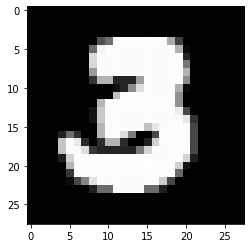

In [9]:
# 10. Dự đoán ảnh
plt.imshow(X_test[200].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[200].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))